# EDA - train|test

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 0)

import missingno as msno
import seaborn as sns
from tqdm import tqdm
from IPython.display import display

sns.set_style('darkgrid')
tqdm.pandas()

In [2]:
train = pd.read_feather('../data/input/application_train.ftr')
test = pd.read_feather('../data/input/application_test.ftr')

In [3]:
# https://www.kaggle.com/c/home-credit-default-risk/discussion/57248
train.replace({'Y': 1, 'N': 0, 'M': 0, 'F': 1, 'XNA': np.nan, 'XAP': np.nan, 365243: np.nan}, inplace=True)
test.replace({'Y': 1, 'N': 0, 'M': 0, 'F': 1, 'XNA': np.nan, 'XAP': np.nan, 365243: np.nan}, inplace=True)

In [4]:
pos = train.TARGET==1
neg = train.TARGET==0

## DAYS

In [5]:
train['before_employ'] = train.DAYS_EMPLOYED - train.DAYS_BIRTH
test['before_employ'] = test.DAYS_EMPLOYED - test.DAYS_BIRTH

train['before_register'] = train.DAYS_REGISTRATION - train.DAYS_EMPLOYED
test['before_register'] = test.DAYS_REGISTRATION - test.DAYS_EMPLOYED

train['before_id_publish'] = train.DAYS_ID_PUBLISH - train.DAYS_REGISTRATION
test['before_id_publish'] = test.DAYS_ID_PUBLISH - test.DAYS_REGISTRATION

In [6]:
neg_pos_ratio = neg.sum()/pos.sum()

In [7]:
len(train)/len(test)

6.308694403413753

In [8]:
def show_hists(cols, func=None):
    for f in cols:
        fig, axes = plt.subplots(ncols=2, figsize=(12, 3))
        if func:
            func(train.loc[neg, f]).hist(bins=300, alpha=.8, ax=axes[0], label='negative')
            func(train.loc[pos, f]).hist(bins=30, alpha=.8, ax=axes[0], label='positive')
            func(train[f]).hist(bins=180, alpha=.8, ax=axes[1], label='train')
            func(test[f]).hist(bins=30, alpha=.8, ax=axes[1], label='test')
        else:
            train.loc[neg, f].hist(bins=300, alpha=.8, ax=axes[0], label='negative')
            train.loc[pos, f].hist(bins=30, alpha=.8, ax=axes[0], label='positive')
            train[f].hist(bins=180, alpha=.8, ax=axes[1], label='train')
            test[f].hist(bins=50, alpha=.8, ax=axes[1], label='test')

        [(ax.legend(), ax.set_title(f)) for ax in axes]
        plt.show()

Index(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'DAYS_LAST_PHONE_CHANGE', 'before_employ', 'before_register',
       'before_id_publish'],
      dtype='object')


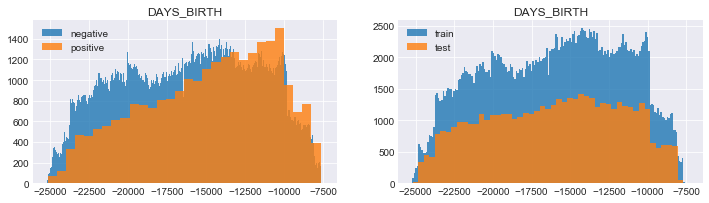

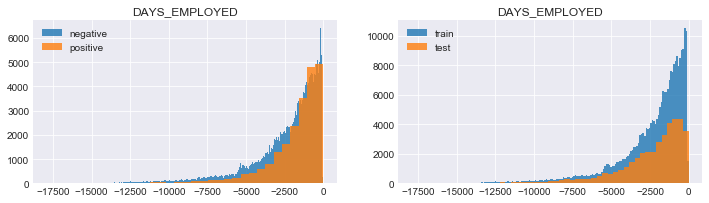

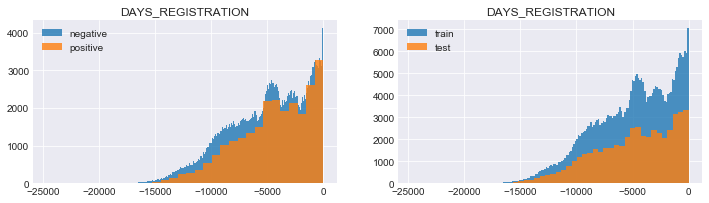

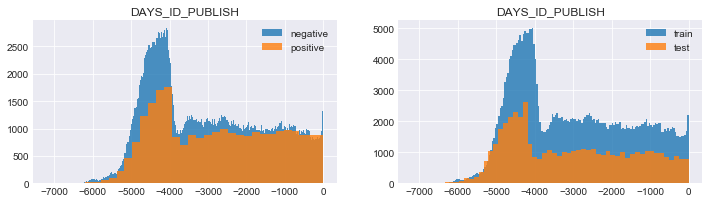

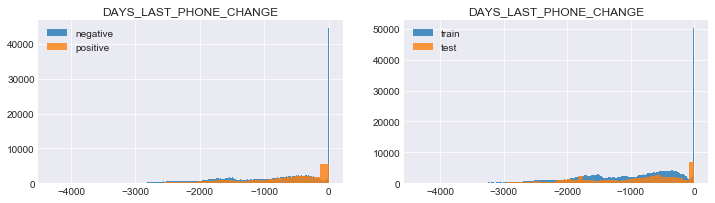

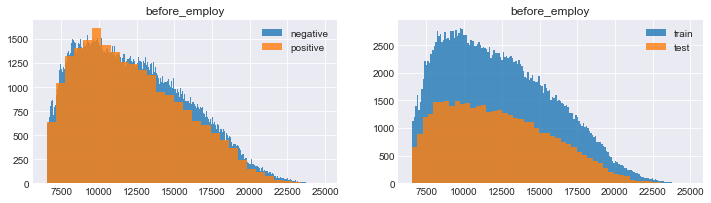

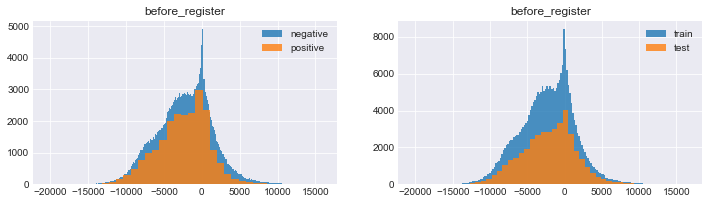

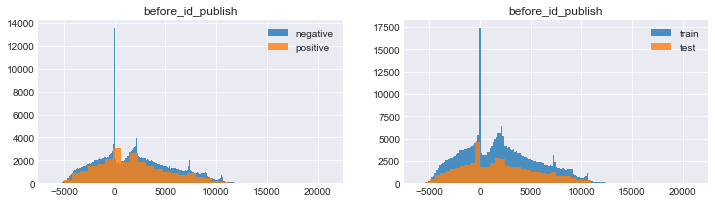

In [9]:
day_cols = train.columns[train.columns.str.startswith('DAYS_') | train.columns.str.startswith('before_')]
print(day_cols)
show_hists(day_cols)

## AMT

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')


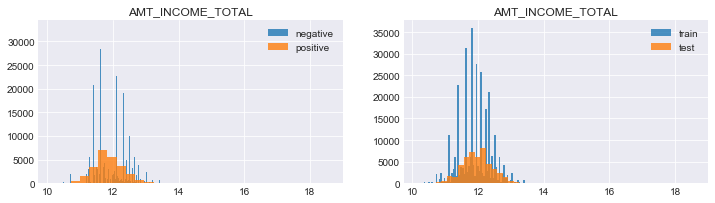

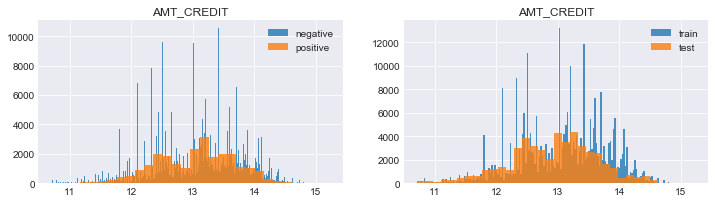

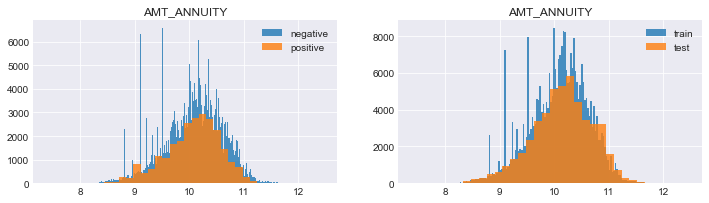

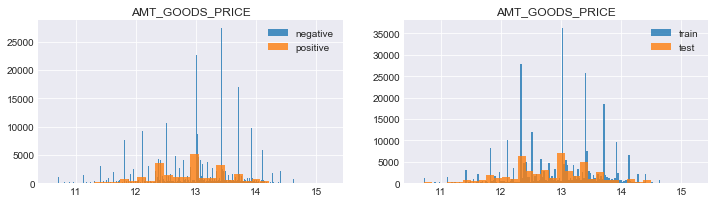

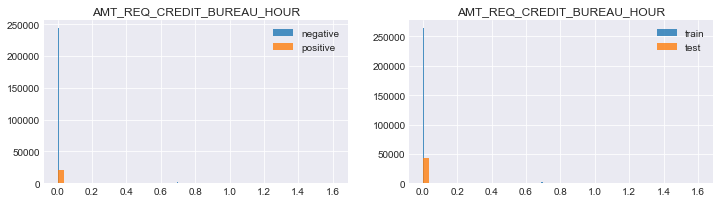

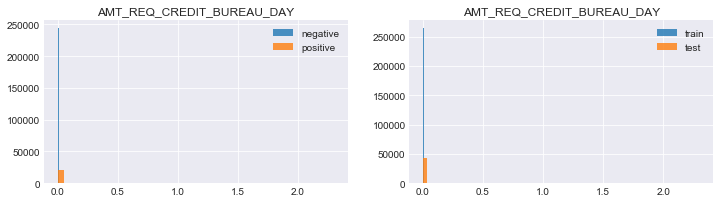

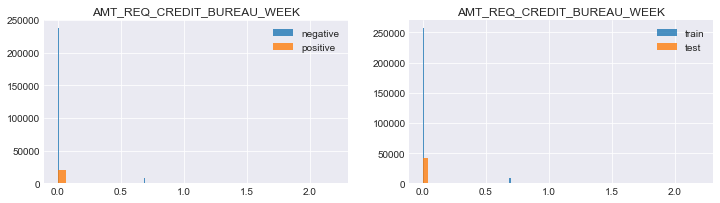

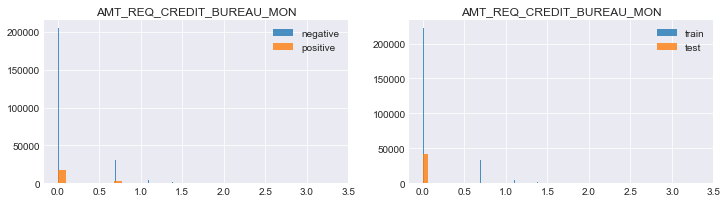

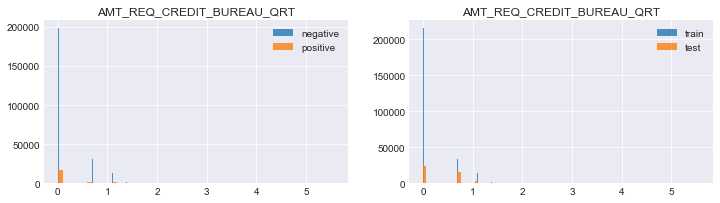

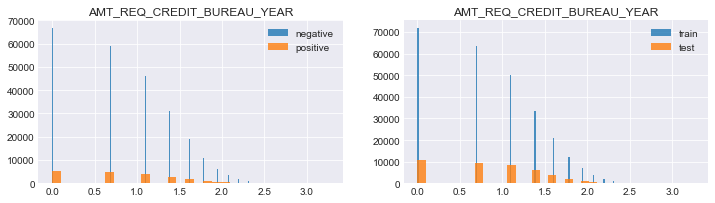

In [10]:
amount_cols = train.columns[train.columns.str.startswith('AMT_')]
print(amount_cols)
show_hists(amount_cols, np.log1p)

In [11]:
train['credit_income_ratio'] = train.AMT_CREDIT / train.AMT_INCOME_TOTAL
train['goods_income_ratio'] = train.AMT_CREDIT / train.AMT_INCOME_TOTAL
train['annuity_income_ratio'] = train.AMT_ANNUITY / train.AMT_INCOME_TOTAL
train['goods_credit_ratio'] = train.AMT_GOODS_PRICE / train.AMT_CREDIT
train['n_division'] = train.AMT_CREDIT / train.AMT_ANNUITY

test['credit_income_ratio'] = test.AMT_CREDIT / test.AMT_INCOME_TOTAL
test['goods_income_ratio'] = test.AMT_CREDIT / test.AMT_INCOME_TOTAL
test['annuity_income_ratio'] = test.AMT_ANNUITY / test.AMT_INCOME_TOTAL
test['goods_credit_ratio'] = test.AMT_GOODS_PRICE / test.AMT_CREDIT
test['n_division'] = test.AMT_CREDIT / test.AMT_ANNUITY

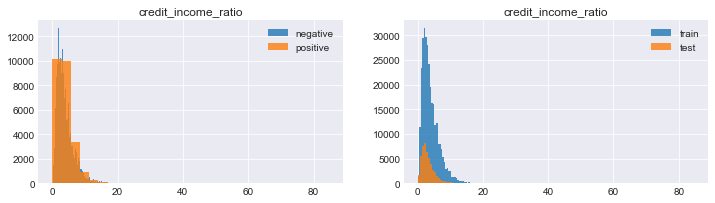

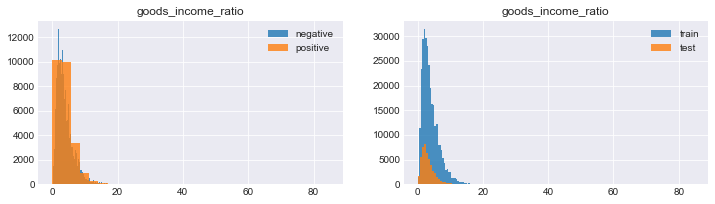

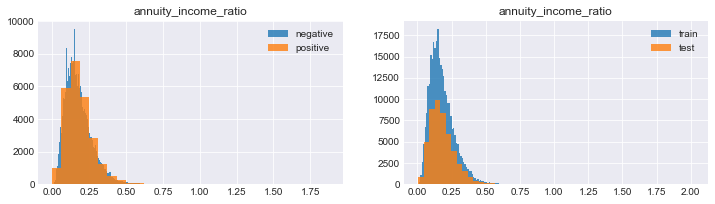

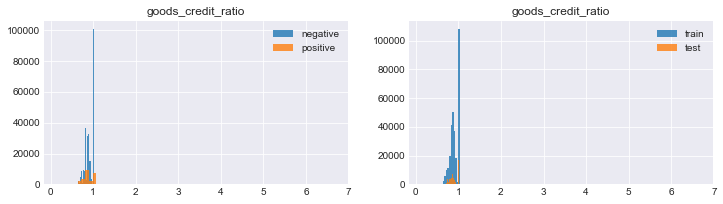

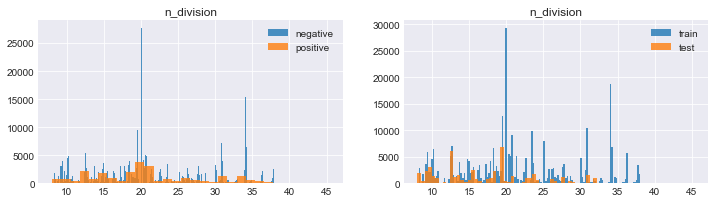

In [12]:
show_hists(['credit_income_ratio', 'goods_income_ratio', 'annuity_income_ratio', 'goods_credit_ratio', 'n_division'])

In [13]:
train_bin = train.filter(regex='(TARGET|CODE_|FLAG_)').fillna(-1).astype(int)
test_bin = test.filter(regex='(TARGET|CODE_|FLAG_)').fillna(-1).astype(int)

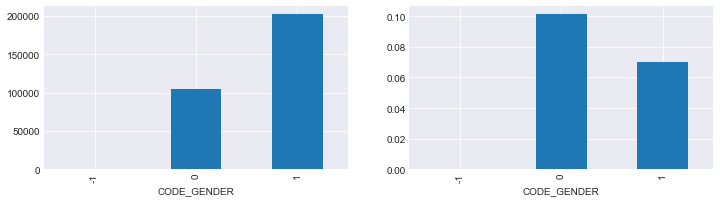

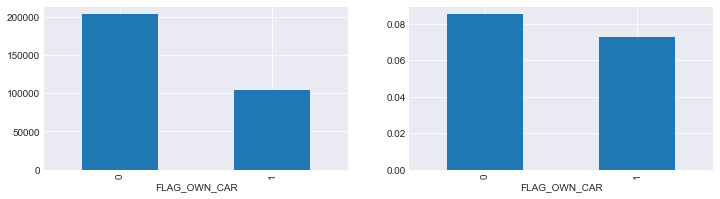

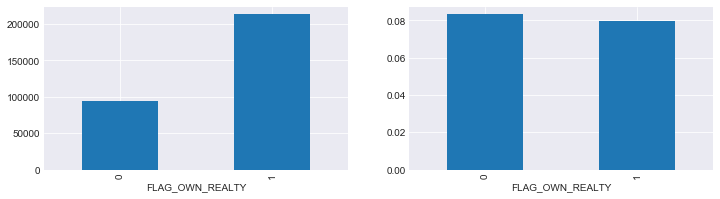

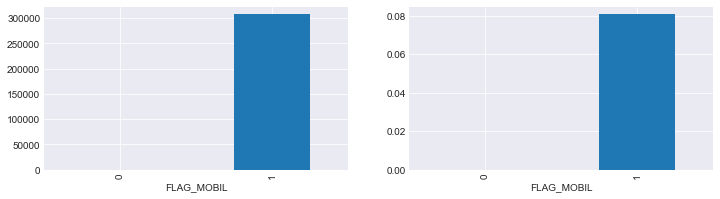

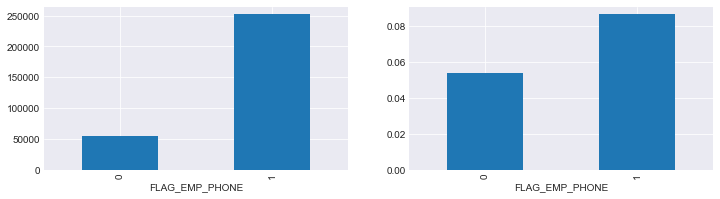

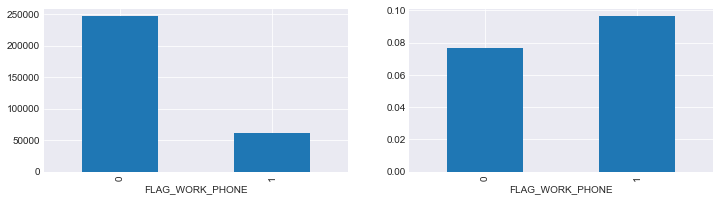

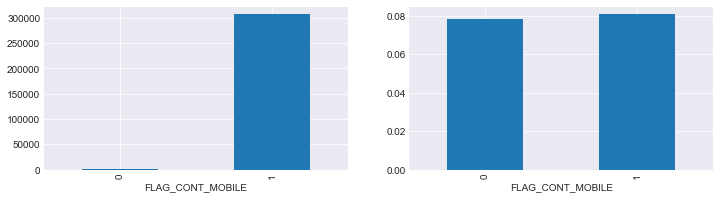

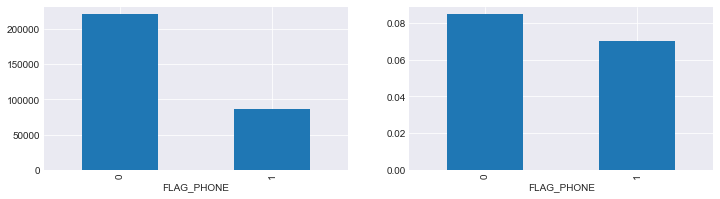

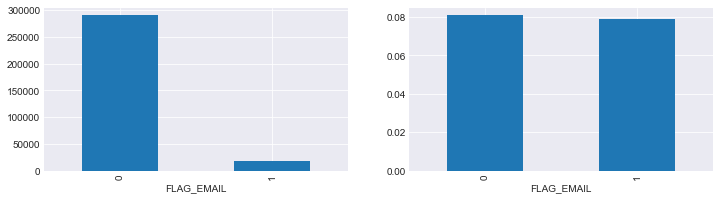

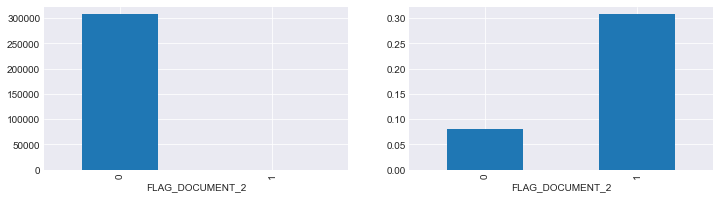

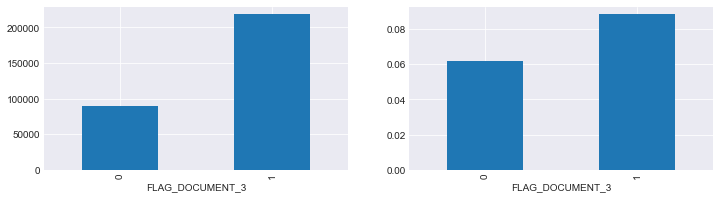

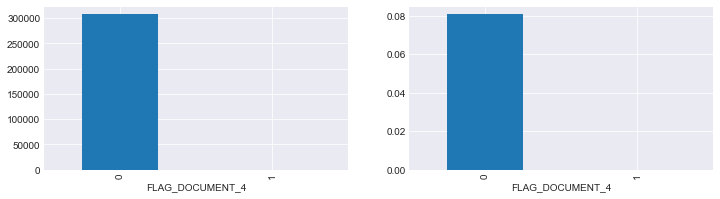

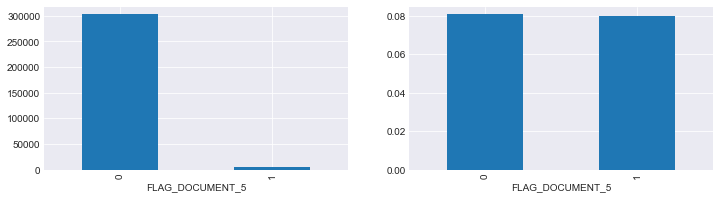

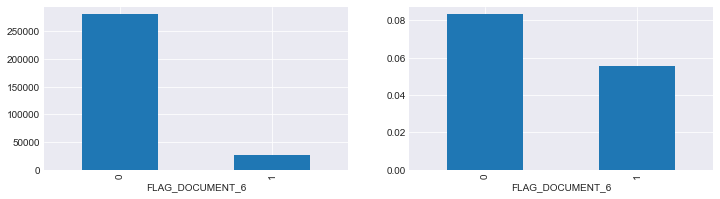

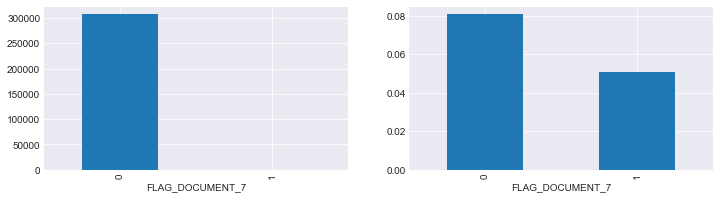

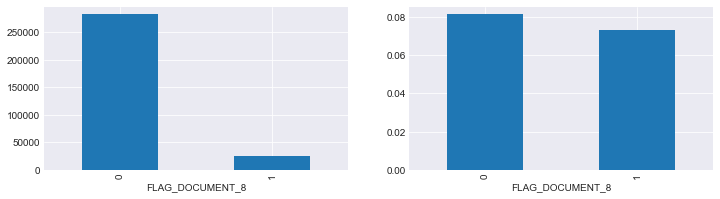

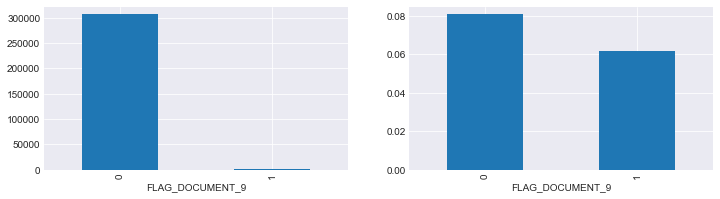

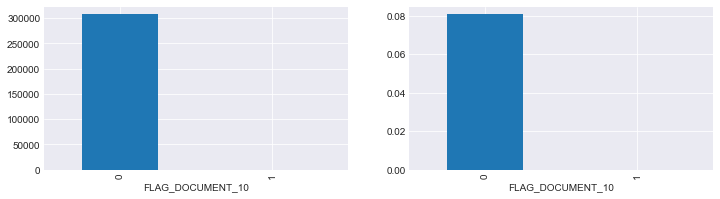

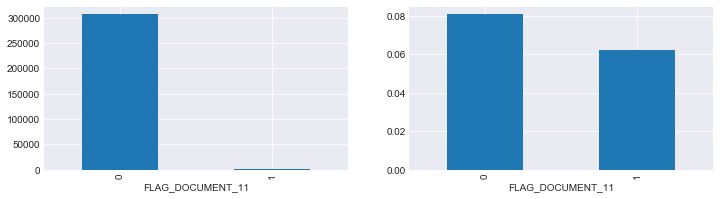

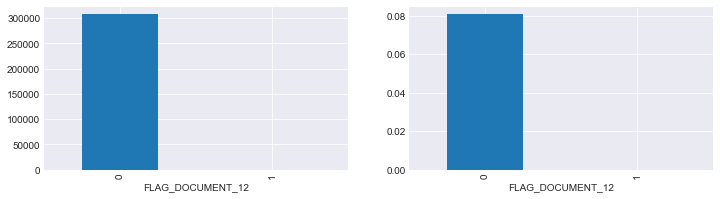

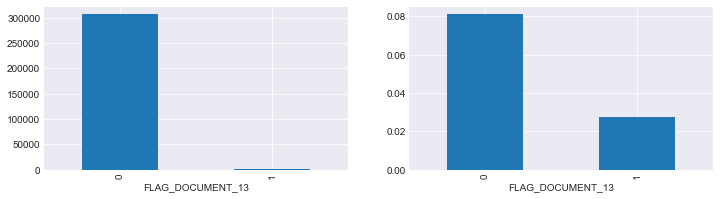

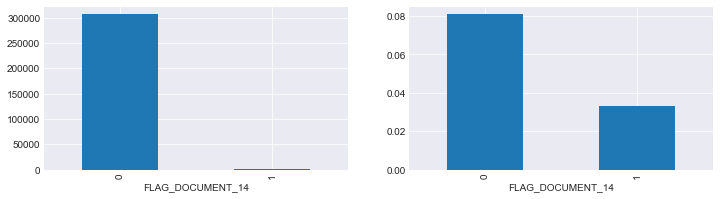

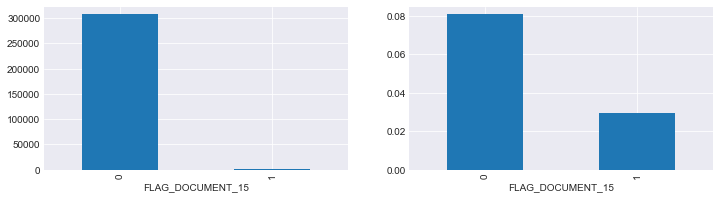

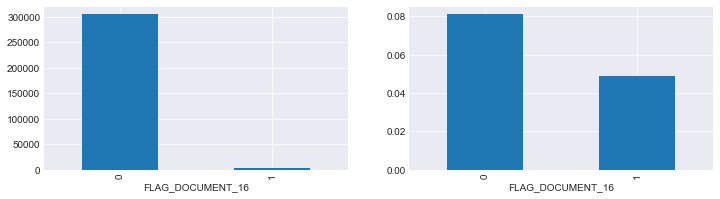

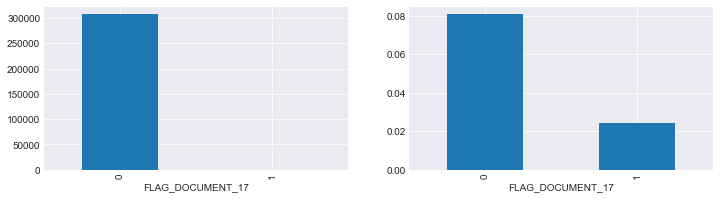

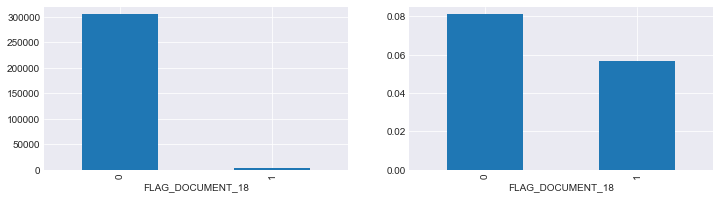

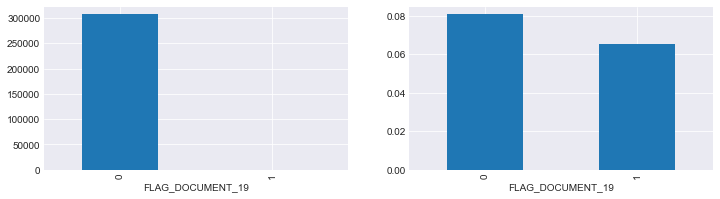

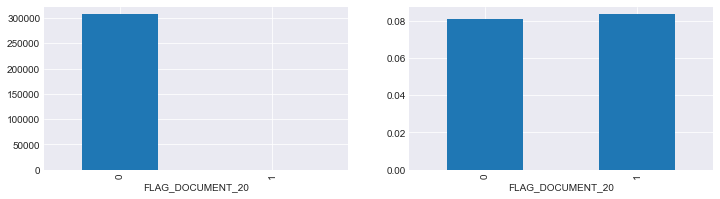

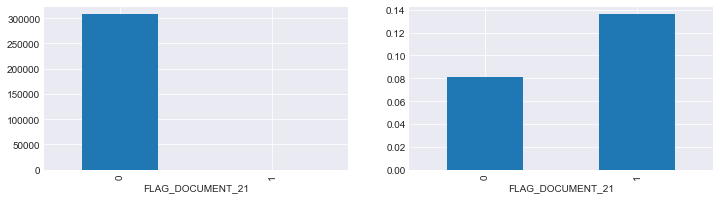

In [30]:
bin_columns = [f for f in train_bin.columns if f != 'TARGET']
for f in bin_columns:
    fig, axes = plt.subplots(ncols=2, figsize=(12, 3))
    train_bin.groupby(f).TARGET.count().plot.bar(ax=axes[0])
    train_bin.groupby(f).TARGET.mean().plot.bar(ax=axes[1])
    plt.show()

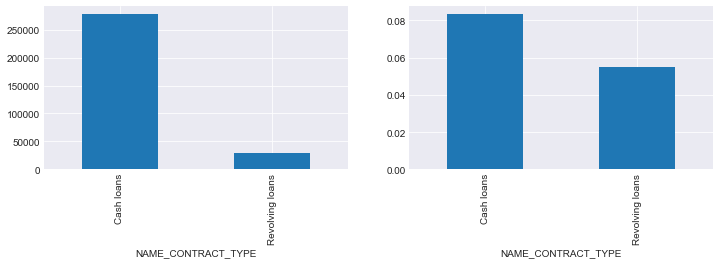

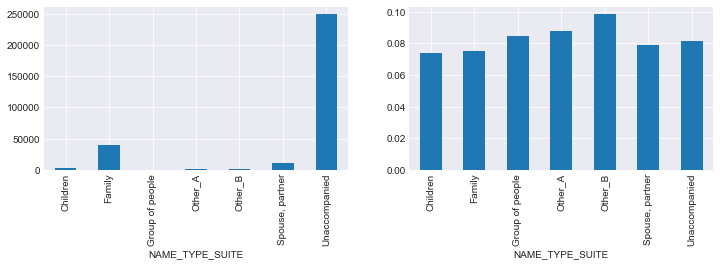

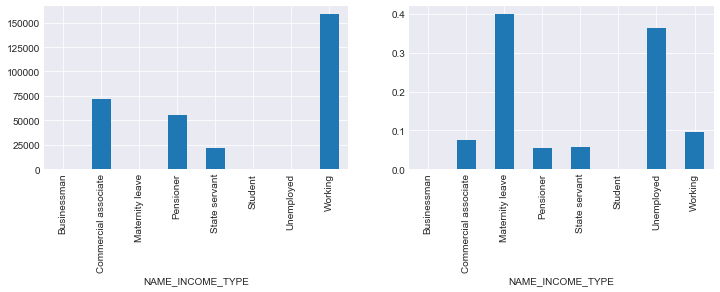

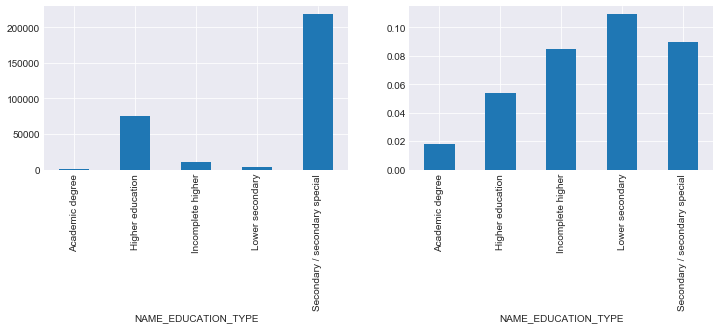

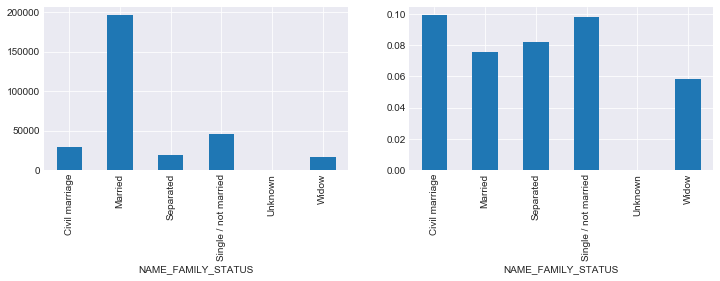

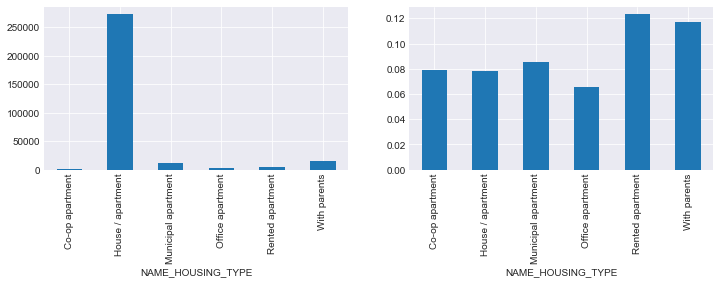

In [28]:
train_name = train.filter(regex='(TARGET|NAME_)')
name_cols = [f for f in train_name.columns if f!='TARGET']
for f in name_cols:
    fig, axes = plt.subplots(ncols=2, figsize=(12, 3))
    train_name.groupby(f).TARGET.count().plot.bar(ax=axes[0])
    train_name.groupby(f).TARGET.mean().plot.bar(ax=axes[1])
    plt.show()